#Tratar dados 'tempos.csv'

Domínio:
- Aparência: sol, nublado, chuva
- Temperatura: -130 ~130 F
- Umidade: 0 ~ 100
- Jogar: sim/nao

Tratar valores NAs

In [64]:
#Importando Bilbiotecas
#Pandas para leitura dos dados e criar um dataframe
import pandas as pd

#Seaborn para visualização dos dados
import seaborn as sns

#Statistics para calcular alguns estásticas como média, mediana, moda, etc.
import statistics as sts

In [94]:
#importar dados
dataset = pd.read_csv('https://raw.githubusercontent.com/elvissoares625/elvissoares625/main/An%C3%A1lise%20Explorat%C3%B3ria/dados/tempo.csv', sep=';')

#visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [66]:
#verificar tamanho do dataset
dataset.shape

(14, 5)

In [67]:
#Verificando se existe valores ausentes
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

- Temos valores null em Umidade e Vento
- Para variaveis categoricas, vamos substituir pela Moda e para variáveis numéricas vamos substituir pela Mediana dos valores.

## Aparencia

In [68]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

Existe valor 'menos' que não está no domínio
Vamos substituir pela moda

In [69]:
dataset['Aparencia'].mode()

0    chuva
1      sol
Name: Aparencia, dtype: object

In [70]:
dataset.loc[dataset['Aparencia'] == 'menos','Aparencia'] = 'sol'

agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

##Temperatura

In [71]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

- o menor valor é 64, está de acordo com o domínio
- o valor máximo é 1220, maior do valor definido no domínio de 130

<Axes: title={'center': 'Temperatura'}, xlabel='Temperatura'>

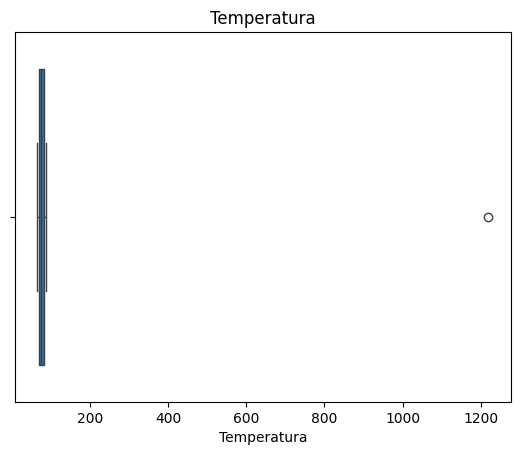

In [72]:
ax = sns.boxplot(dataset['Temperatura'], orient='h')
ax.set_title('Temperatura')
ax

- Aparentemente o valor de 1200 é um erro de digitação, por que não existe outro outliers presentes.
- Vamos substituir o valor pela mediana.
- Por que mediana ? Utilizado a mediana, por que a média é influenciada pelos valores fora do domínio



In [73]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [74]:
#vamos identificar valores menores que -130 e maior que 130 e sustituir pela mediana
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura']

7    1220
Name: Temperatura, dtype: int64

- Só existe o registro de 1220 fora do domínio

In [75]:
#Aplicado o mesmo filtro e substituido o valor pela mediana
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

In [76]:
dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

- Veja como a Media (mean) foi alterada quando substituido o valor fora do domínio para o valor da Mediana. Está muito próximo da mediana (50%).
- Isso nos diz que o conjunto está bem próximo de uma distribuição normal.

<Axes: title={'center': 'Temperatura'}, xlabel='Temperatura'>

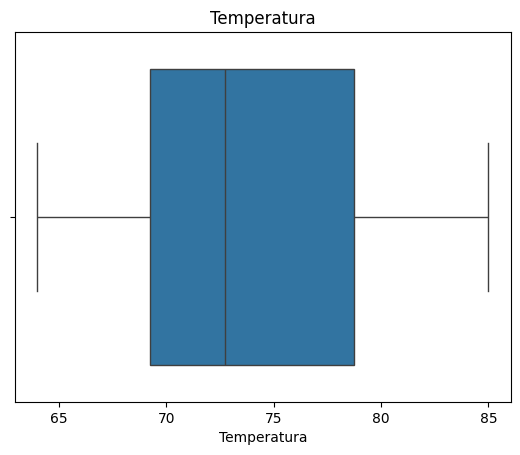

In [77]:
ax = sns.boxplot(dataset['Temperatura'], orient='h')
ax.set_title('Temperatura')
ax

<ipython-input-78-857e3b769ec1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset['Temperatura'])


<Axes: title={'center': 'Temperatura'}, xlabel='Temperatura', ylabel='Density'>

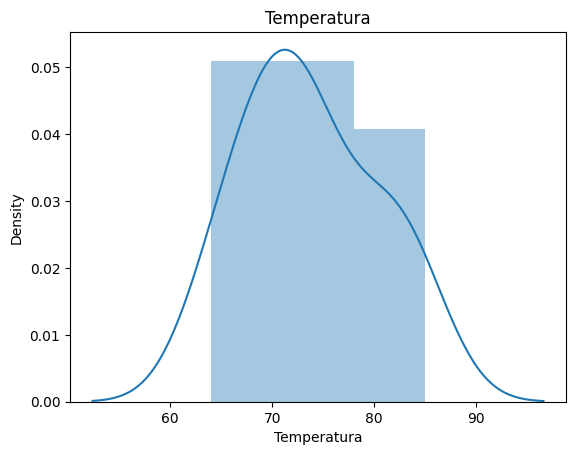

In [78]:
ax = sns.distplot(dataset['Temperatura'])
ax.set_title('Temperatura')
ax

- A curva dos dados se ajuste muito bem a uma distribuição normal

##Umidade

In [79]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

- A média e mediana estão bem próximos, então temos dados bem ajustados
- Porém veja que o valor máximo presente nos dados é 200, fora do dominio de 0 ~ 100

<Axes: title={'center': 'Umidade'}, xlabel='Umidade'>

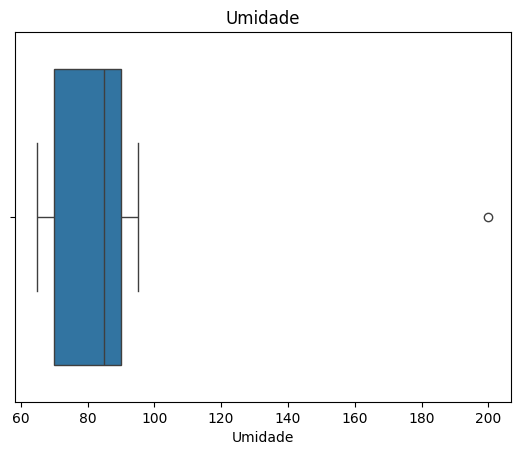

In [80]:
ax = sns.boxplot(dataset['Umidade'], orient='h')
ax.set_title('Umidade')
ax

In [81]:
#filtrando valores fora do dominio
dataset.loc[(dataset['Umidade'] < 0 ) | (dataset['Umidade'] > 100), 'Umidade']

9    200.0
Name: Umidade, dtype: float64

In [82]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [83]:
#substituindo valores fora do dominio
dataset.loc[(dataset['Umidade'] < 0 ) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

#também vamos substituir os valores null pela mediana
dataset['Umidade'].fillna(mediana, inplace=True)

In [84]:
dataset['Umidade'].describe()

count    14.000000
mean     81.285714
std       9.585073
min      65.000000
25%      71.250000
50%      85.250000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

<Axes: title={'center': 'Umidade'}, xlabel='Umidade'>

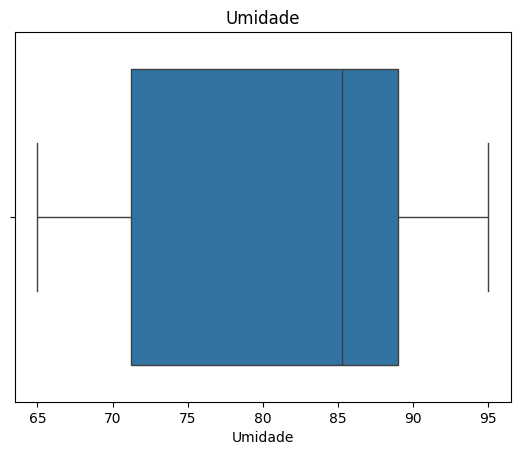

In [85]:
ax = sns.boxplot(dataset['Umidade'], orient='h')
ax.set_title('Umidade')
ax

#Vento

In [86]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [87]:
dataset['Vento'].isnull().sum()

1

In [88]:
#Substituindo valores null pela Moda
dataset['Vento'].fillna('FALSO', inplace=True)